In [1]:
#Importing dependenies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [4]:
#Data collection
big_mart_data =pd.read_csv(r"C:\Users\tijo.thomas\OneDrive - edelweisstokio.in\Desktop\Python\Big mart sales Data\archive\Train.csv")
big_mart_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Number of data points and number of features
big_mart_data.shape

(8523, 12)

In [6]:
#Getting some information about the dataset
big_mart_data.info()
# big_mart_data['Item_Identifier'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Observations
Categorical features
Item_Identifier    
Item_Fat_Content  
Item_Type
Outlet_Identifier   
Outlet_Size  
Outlet_Location_Type        
Outlet_Type    

Out of 12 there are 7 categorical features

In [8]:
#Checking for missimg values\
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#Handling Missing values
Mean --> Average Value
Mode --> Most repeated Value

SyntaxError: invalid syntax (2173181435.py, line 2)

In [10]:
#Mean value of 'Item weight' column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [11]:
#Filling the missing values in the 'Item weight ' column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)

In [12]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Replacing the missing values in 'Outlet_Size' with Mode
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size' , columns= 'Outlet_Type' , aggfunc=(lambda x: x.mode()[0]))
# print(mode_of_outlet_size)

In [14]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [16]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [17]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [18]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#Data analaysis
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
#Numerical features
sns.set()

C:\Users\tijo.thomas\AppData\Local\Temp\ipykernel_4468\2409125423.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


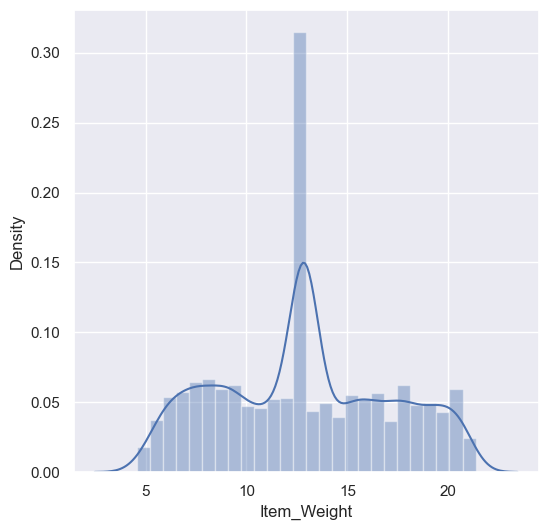

In [21]:
#Item weight distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\tijo.thomas\AppData\Local\Temp\ipykernel_4468\896149029.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


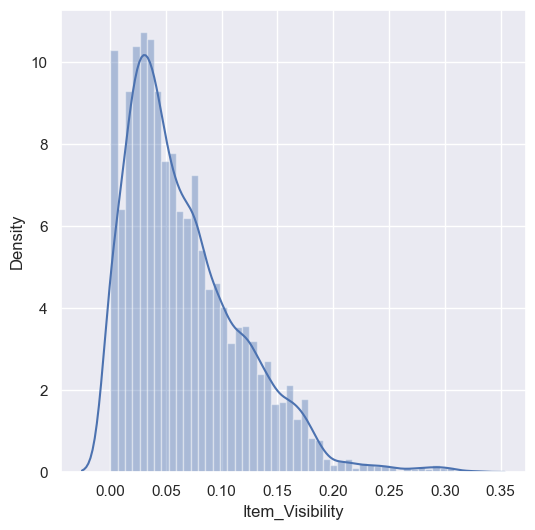

In [22]:
#Item visibilty distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

C:\Users\tijo.thomas\AppData\Local\Temp\ipykernel_4468\3916759397.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


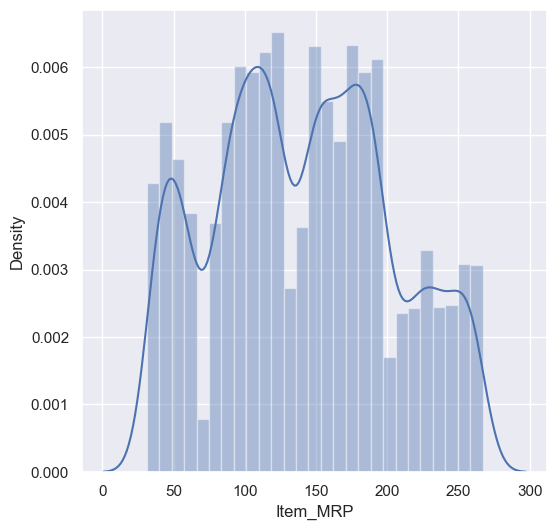

In [23]:
#Item MRP distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\tijo.thomas\AppData\Local\Temp\ipykernel_4468\2400653968.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


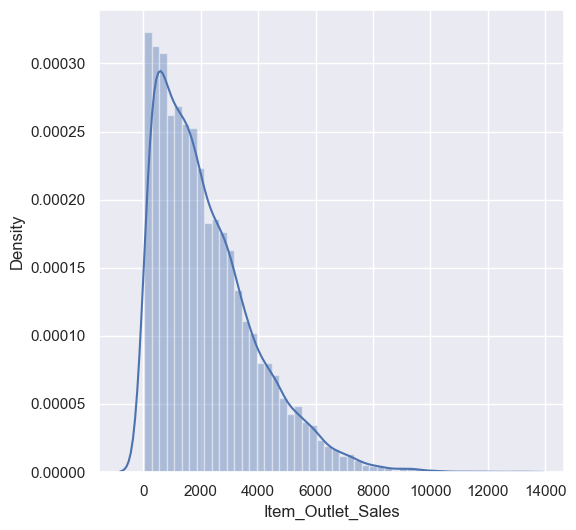

In [24]:
#Item oUTLET SALES distribution
plt.figure(figsize = (6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

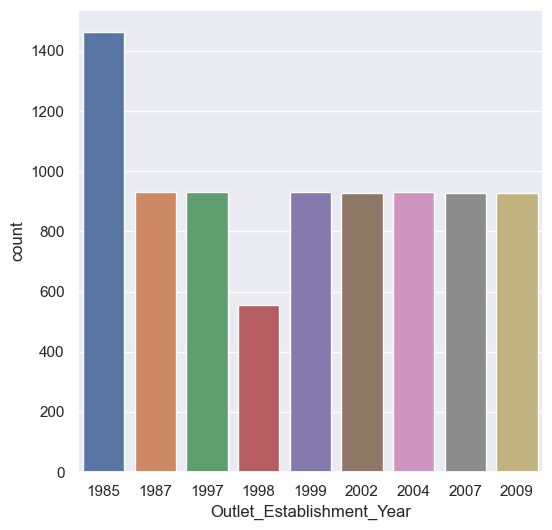

In [25]:
#Outet establishment year column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = big_mart_data)
plt.show()

Categorical Features


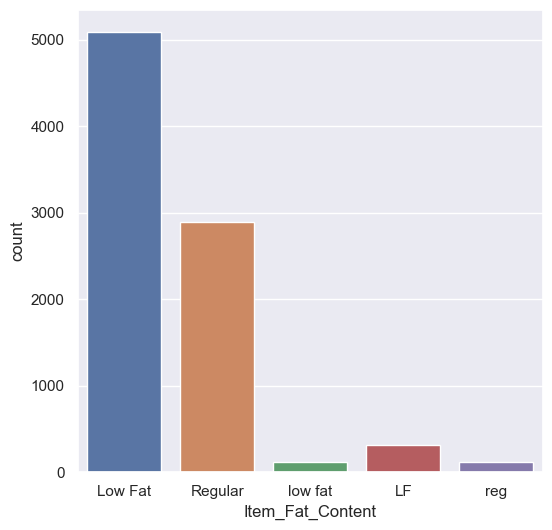

In [26]:
# Item Fat Column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', data = big_mart_data)
plt.show()

In [27]:
#Observations
Need to clean data with similar names Low fat , low fat , LF

SyntaxError: invalid syntax (363965346.py, line 2)

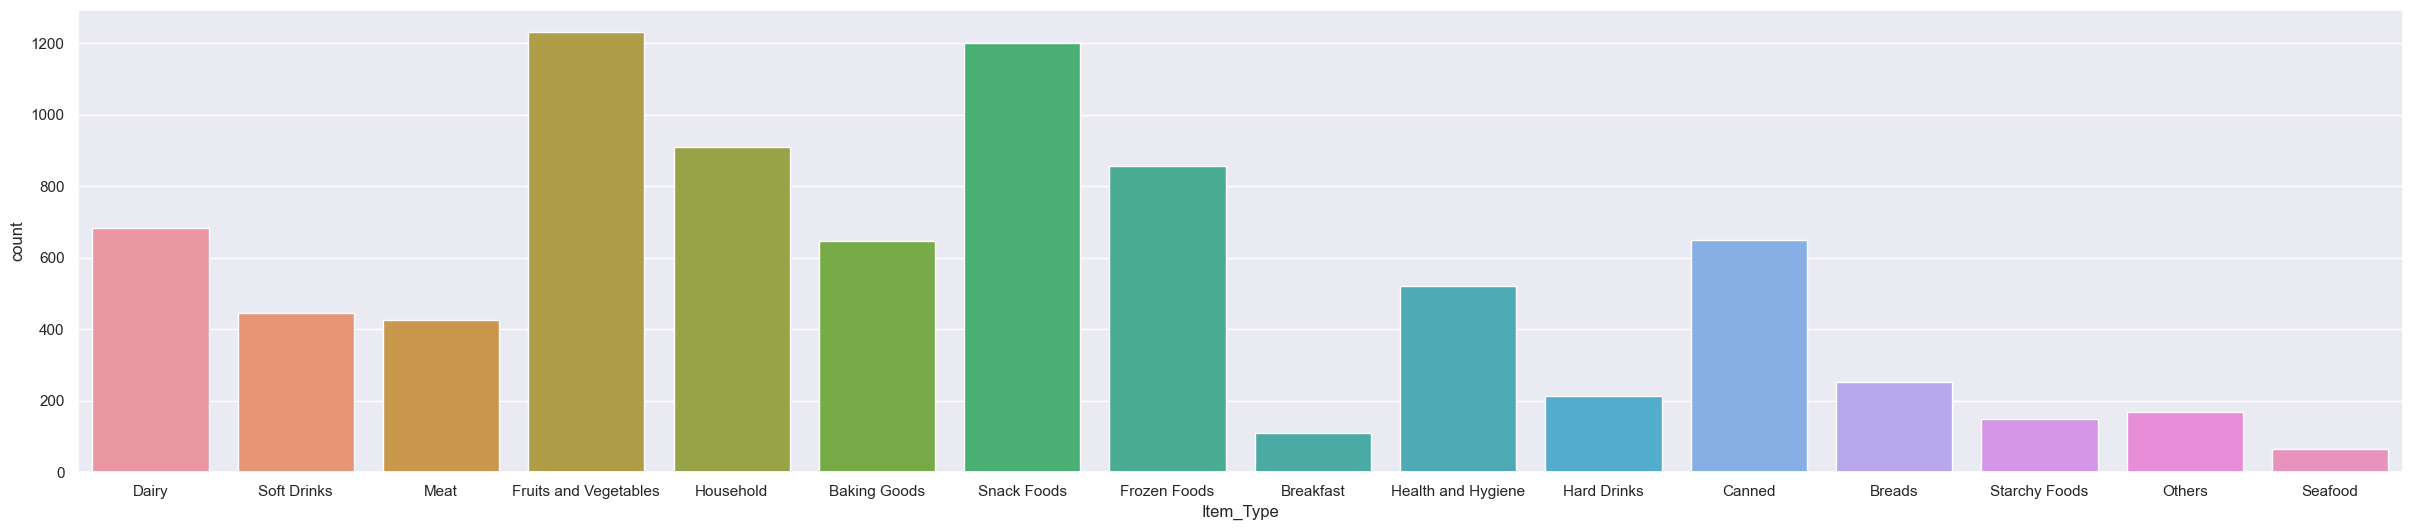

In [ ]:
# Item Fat Column
plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type', data = big_mart_data)
plt.show()

In [ ]:
#Data Preprocessing/Feature engineering
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
big_mart_data.replace({"Item_Fat_Content": {'low fat': 'Low Fat' , 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [30]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
#Label Encoding
encoder = LabelEncoder()

In [32]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [33]:
# big_mart_data = big_mart_data.drop(columns="Outlet_Size" )

In [34]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [35]:
#Splitting Features and targets
X = big_mart_data.drop(columns='Item_Outlet_Sales')
Y = big_mart_data['Item_Outlet_Sales']

In [36]:
#Train Test Spolit
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=0)
X_train.shape , X_test.shape

((6818, 11), (1705, 11))

In [37]:
X_train.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,1.000000,0.054077,-0.121465,-0.023712,-0.003726,0.020300,-0.008700,-0.010063,-0.003873,0.003724,-0.001997
Item_Weight,0.054077,1.000000,-0.025013,-0.009770,0.026037,0.024848,-0.004646,-0.007308,-0.021568,0.004845,0.000425
Item_Fat_Content,-0.121465,-0.025013,1.000000,0.048184,-0.138162,0.014963,0.003594,-0.003746,-0.004390,-0.010913,-0.007995
Item_Visibility,-0.023712,-0.009770,0.048184,1.000000,-0.032389,-0.003061,-0.090039,-0.073915,0.097105,-0.036348,-0.168978
Item_Type,-0.003726,0.026037,-0.138162,-0.032389,1.000000,0.031554,-0.011957,0.003855,0.002010,0.009312,-0.002671
Item_MRP,0.020300,0.024848,0.014963,-0.003061,0.031554,1.000000,0.008507,0.003658,0.004177,-0.004692,-0.001599
Outlet_Identifier,-0.008700,-0.004646,0.003594,-0.090039,-0.011957,0.008507,1.000000,0.074326,0.260485,-0.715589,0.093778
Outlet_Establishment_Year,-0.010063,-0.007308,-0.003746,-0.073915,0.003855,0.003658,0.074326,1.000000,0.418500,-0.081410,-0.117795
Outlet_Size,-0.003873,-0.021568,-0.004390,0.097105,0.002010,0.004177,0.260485,0.418500,1.000000,-0.482475,-0.404167
Outlet_Location_Type,0.003724,0.004845,-0.010913,-0.036348,0.009312,-0.004692,-0.715589,-0.081410,-0.482475,1.000000,0.473367


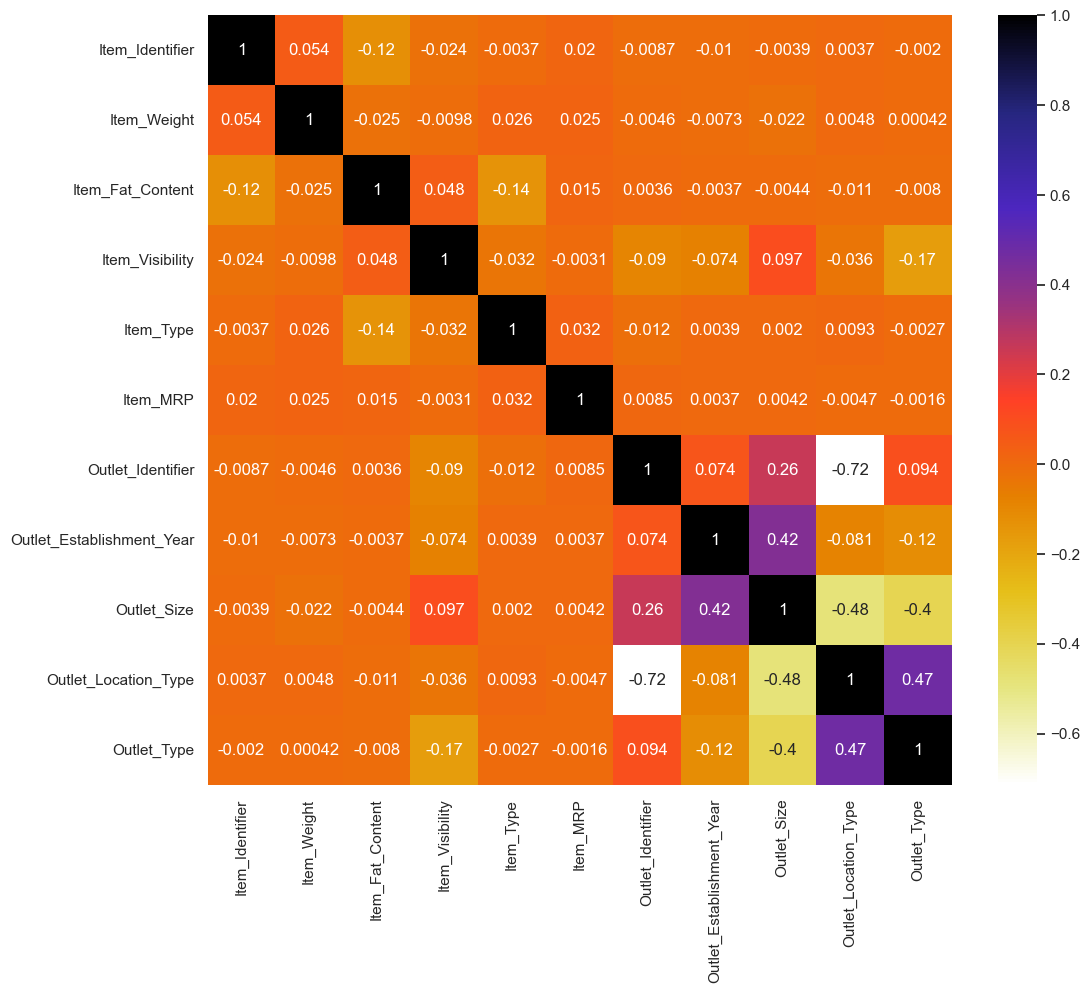

In [38]:
#Feature Selction only on training set
#Pearson correlation ranges between +1 to -1
plt.figure(figsize= (12,10))
cor = X_train.corr()
sns.heatmap(cor , annot =True , cmap =  plt.cm.CMRmap_r)
plt.show()




In [39]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [40]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))


1

In [41]:
corr_features


{'Outlet_Location_Type'}

In [44]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [46]:
X_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
4931,1487,14.500000,0,0.089960,8,159.5604,7,2002,2,1
4148,392,12.857645,0,0.009535,13,64.5510,5,1985,1,3
7423,1396,11.500000,0,0.017742,8,129.6626,2,2007,2,1
4836,642,10.195000,0,0.000000,5,143.1154,2,2007,2,1
944,436,21.000000,0,0.049264,13,195.0478,1,1987,0,1
...,...,...,...,...,...,...,...,...,...,...
4644,543,12.500000,0,0.112682,3,119.1440,3,2009,1,2
6179,2,12.857645,1,0.223985,14,186.2924,4,1985,2,0
1861,422,12.800000,0,0.069561,15,263.0252,1,1987,0,1
3598,1307,12.857645,0,0.162857,9,54.5956,4,1985,2,0


In [47]:
#Machine Learning Model
#XGB Regressor
regressor = XGBRegressor()


In [48]:
regressor.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [49]:
#Evaluation
#Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [50]:
# R SQUARED value
r2_train = metrics.r2_score(Y_train , training_data_prediction)

In [51]:
print('R Squared value=', r2_train)

R Squared value= 0.8621186754338315


In [53]:
#Predicting on training data
testing_data_prediction = regressor.predict(X_test)

In [54]:
r2_test = metrics.r2_score(Y_test , testing_data_prediction)

In [55]:
print('R Squared value=', r2_test)

R Squared value= 0.4958603583153206
